# Exploratory Data Analysis
In this Jupiter Notebook, we will perform the exploratory data analysis on the cleaned data from the Dataset. We will analyze the number of differet books that were published, as well as the ratings each author has.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

authors = pd.read_csv('../MiniprojectData/authors_clean.csv')
books = pd.read_csv('../MiniprojectData/books_clean.csv')
reviews = pd.read_csv('../MiniprojectData/reviews_clean.csv')

for df, name in [(authors, 'authors'), (books, 'books'), (reviews, 'reviews')]:
    print(f"--- {name} ---")
    # df.info()
    display(df.describe(include='all').T.head(20))

    non_null = df.notna().sum()
    nulls = df.isna().sum()
    pct_null = (nulls / len(df) * 100).round(2) if len(df) > 0 else nulls * 0
    summary = pd.DataFrame({'non_null': non_null, 'nulls': nulls, 'pct_null': pct_null})
    display(summary.sort_values('pct_null', ascending=False))

    print("Duplicates:", df.duplicated().sum())
    print()

--- authors ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
main_author,94316,94316,(Dr) Seuss,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_books,94318.0,NaN,NaN,NaN,1.502947,2.031117,1.0,1.0,1.0,1.0,134.0
total_reviews,94318.0,NaN,NaN,NaN,24.808785,276.444859,1.0,2.0,4.0,11.0,41723.0
is_self_published,94318,2,False,79174,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_indie,94318,2,False,80910,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,non_null,nulls,pct_null
main_author,94316,2,0.0
total_books,94318,0,0.0
total_reviews,94318,0,0.0
is_self_published,94318,0,0.0
is_indie,94318,0,0.0


Duplicates: 0

--- books ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Title,141755,141755,Dr. Seuss: American Icon,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
description,141755,131561,Unlike some other reproductions of classic tex...,92,NaN,NaN,NaN,NaN,NaN,NaN,NaN
authors,141755,100963,['Agatha Christie'],129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
image,135045,126784,http://books.google.com/books/content?id=dPucx...,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
previewLink,141755,141339,http://books.google.com/books?id=acwPAgAAQBAJ&...,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publisher,141755,12937,self-published,17787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
publishedDate,141755,10998,2004,3302,NaN,NaN,NaN,NaN,NaN,NaN,NaN
infoLink,141755,138477,https://play.google.com/store/books/details?id...,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN
categories,141755,5317,['Fiction'],22371,NaN,NaN,NaN,NaN,NaN,NaN,NaN
main_author,141753,94316,William Shakespeare,134,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,non_null,nulls,pct_null
image,135045,6710,4.73
Title,141755,0,0.00
description,141755,0,0.00
authors,141755,0,0.00
previewLink,141755,0,0.00
publisher,141755,0,0.00
publishedDate,141755,0,0.00
infoLink,141755,0,0.00
categories,141755,0,0.00
main_author,141753,2,0.00


Duplicates: 0

--- reviews ---


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ISBN,2339915,148761,B000IEZE3G,6796,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Title,2339915,141755,The Hobbit,22023,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,2339915.0,NaN,NaN,NaN,4.212521,1.205299,1.0,4.0,5.0,5.0,5.0
review_text,2339909,1679239,"Louisa May Alcott wrote many books, but ""Littl...",225,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,non_null,nulls,pct_null
ISBN,2339915,0,0.0
Title,2339915,0,0.0
rating,2339915,0,0.0
review_text,2339909,6,0.0


Duplicates: 24585



## Missing values
Here we take a look at potentially missing values. Knowing what values are missing and how often helps us decide what values we might have to further research or estimate.


--- authors ---
Very few missing values in authors: 2 missing cells (0.0% of all cells).


,nulls,pct_null
main_author,2,0.0


,nulls,pct_null
main_author,2,0.0



--- books ---
Very few missing values in books: 6712 missing cells (0.338% of all cells).


,nulls,pct_null
image,6710,4.73
main_author,2,0.00


,nulls,pct_null
image,6710,4.73
main_author,2,0.00


/var/folders/v3/lrf5gr496b12fgybh8_kfd7w0000gn/T/ipykernel_25156/3261851942.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top['pct_null'].values, y=top.index, palette='viridis')


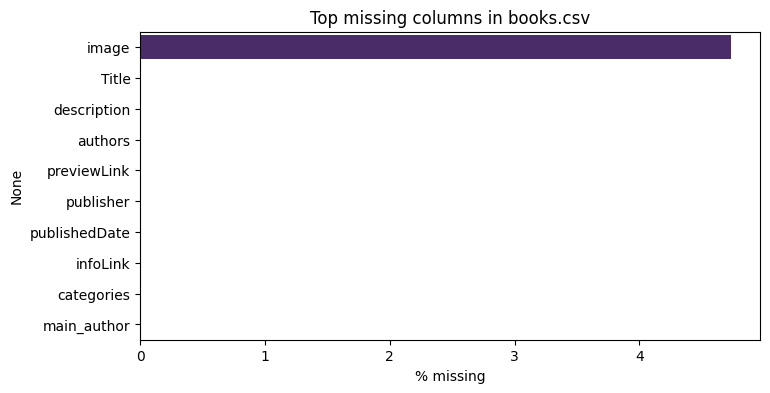


--- reviews ---
Very few missing values in reviews: 6 missing cells (0.0% of all cells).


,nulls,pct_null
review_text,6,0.0


,nulls,pct_null
review_text,6,0.0


In [2]:
for df, name in [(authors, 'authors'), (books, 'books'), (reviews, 'reviews')]:
    print(f'--- {name} ---')
    total = len(df)
    null_counts = df.isna().sum()
    pct = (null_counts / total * 100).round(2) if total > 0 else null_counts * 0
    miss = pd.DataFrame({'nulls': null_counts, 'pct_null': pct}).sort_values('pct_null', ascending=False)

    total_nulls = null_counts.sum()
    total_cells = total * df.shape[1] if total > 0 else 0
    pct_cells_missing = round((total_nulls / total_cells * 100), 3) if total_cells > 0 else 0

    if total_nulls == 0:
        print(f'No missing values in {name} (0 of {total} rows).')
        print()

    if pct_cells_missing < 1:
        print(f'Very few missing values in {name}: {total_nulls} missing cells ({pct_cells_missing}% of all cells).')
        display(miss[miss['nulls']>0])
        print()

    # Standard behavior: show the missings table and plot the top missing columns
    display(miss[miss['nulls']>0])

    top = miss.head(10)
    if top['pct_null'].sum() > 0:
        plt.figure(figsize=(8, max(2, len(top)*0.4)))
        sns.barplot(x=top['pct_null'].values, y=top.index, palette='viridis')
        plt.xlabel('% missing')
        plt.title(f'Top missing columns in {name}.csv')
        plt.show()
    print()

/var/folders/v3/lrf5gr496b12fgybh8_kfd7w0000gn/T/ipykernel_25156/2966940962.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


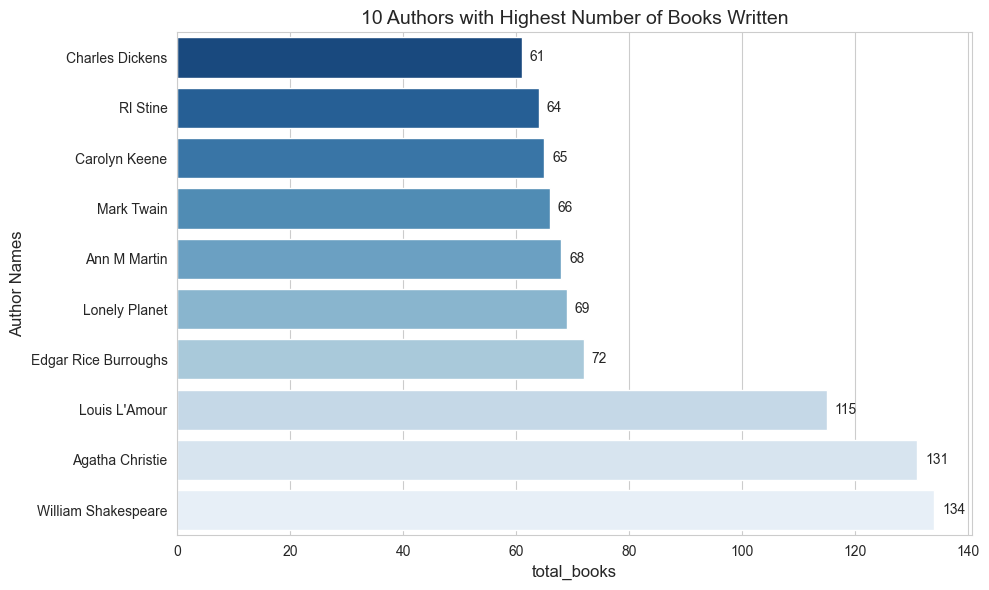

In [5]:
authors['total_books'] = pd.to_numeric(authors['total_books'], errors='coerce').fillna(0).astype(int)

top10 = authors.nlargest(11, 'total_books').copy()
idx = top10[top10['main_author'].str.strip().str.lower() == 'various'].index
top10 = top10.drop(idx)
top10 = top10.sort_values('total_books', ascending=True)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(
    x='total_books',
    y='main_author',
    data=top10,
    palette='Blues_r'
)

for p in ax.patches:
    width = int(p.get_width())
    ax.text(
        width + max(top10['total_books'].max() * 0.01, 0.5),
        p.get_y() + p.get_height() / 2,
        f'{width}',
        va='center',
        ha='left',
        fontsize=10
    )

ax.set_title('10 Authors with Highest Number of Books Written', fontsize=14)
ax.set_xlabel('total_books', fontsize=12)
ax.set_ylabel('Author Names', fontsize=12)

plt.tight_layout()
plt.show()

/var/folders/v3/lrf5gr496b12fgybh8_kfd7w0000gn/T/ipykernel_25156/2428818844.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


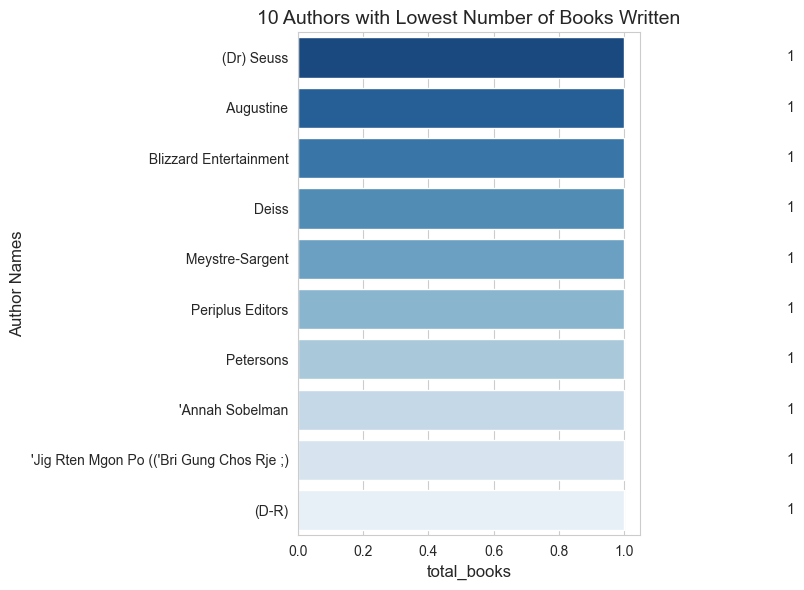

In [6]:
bot10 = authors.nsmallest(10, 'total_books').copy()
bot10 = bot10.sort_values('total_books', ascending=False)

plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
ax = sns.barplot(
    x='total_books',
    y='main_author',
    data=bot10,
    palette='Blues_r'
)

for p in ax.patches:
    width = int(p.get_width())
    ax.text(
        width + max(bot10['total_books'].max() * 0.01, 0.5),
        p.get_y() + p.get_height() / 2,
        f'{width}',
        va='center',
        ha='left',
        fontsize=10
    )

ax.set_title('10 Authors with Lowest Number of Books Written', fontsize=14)
ax.set_xlabel('total_books', fontsize=12)
ax.set_ylabel('Author Names', fontsize=12)

plt.tight_layout()
plt.show()

/var/folders/v3/lrf5gr496b12fgybh8_kfd7w0000gn/T/ipykernel_25156/2021276080.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='n_books', y=genre_col, data=plot_df, palette='viridis')


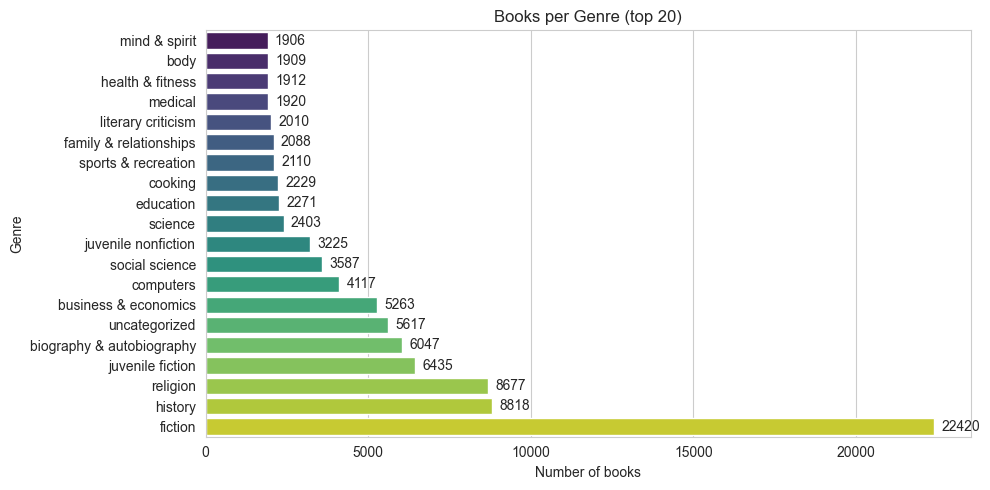

In [19]:
genre_col = 'genre'
exploded = books[[genre_col, 'Title']].dropna(subset=[genre_col]).copy()
exploded[genre_col] = exploded[genre_col].astype(str)

sep = ','
exploded = exploded.assign(**{genre_col: exploded[genre_col].str.split(sep)})
exploded = exploded.explode(genre_col)

exploded[genre_col] = exploded[genre_col].str.strip().str.lower()

genre_counts = exploded.groupby(genre_col)['Title'].nunique().reset_index(name='n_books')
genre_counts = genre_counts.sort_values('n_books', ascending=True)

max_display = 20
plot_df = genre_counts.tail(max_display).copy()

plt.figure(figsize=(10, max(4, len(plot_df)*0.25)))
sns.set_style('whitegrid')
ax = sns.barplot(x='n_books', y=genre_col, data=plot_df, palette='viridis')
ax.set_xlabel('Number of books')
ax.set_ylabel('Genre')
ax.set_title('Books per Genre (top {})'.format(max_display))

for p in ax.patches:
    width = int(p.get_width())
    ax.text(width + max(plot_df['n_books'].max()*0.01, 1), p.get_y()+p.get_height()/2, str(width), va='center')

plt.tight_layout()
plt.show()

/var/folders/v3/lrf5gr496b12fgybh8_kfd7w0000gn/T/ipykernel_25156/3559659761.py:32: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  agg = gen.groupby(genre_col).apply(lambda df: pd.Series({
/var/folders/v3/lrf5gr496b12fgybh8_kfd7w0000gn/T/ipykernel_25156/3559659761.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='weighted_avg_rating', y=genre_col, data=top_genres, palette='viridis')


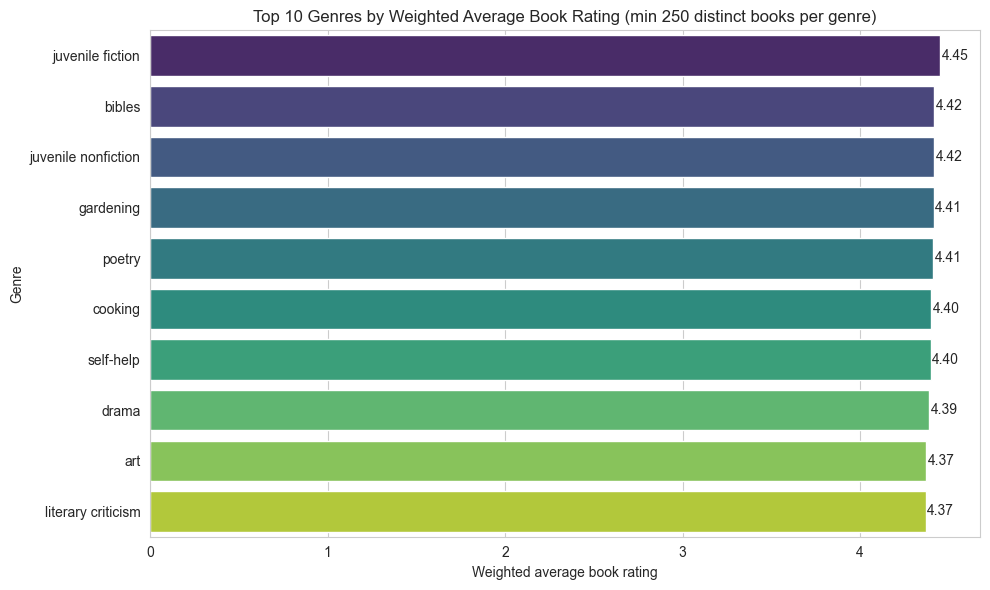

In [16]:
# Plot weighted average book rating per genre (weight by n_reviews) and show top 30 genres
# Filter out genres with few books (require > 20 distinct books)

genre_col = 'genre'
rating_col = 'avg_rating'
count_col = 'review_count'
min_books = 250

# Validate columns
for c in (genre_col, rating_col, count_col):
    if c not in books.columns:
        raise KeyError(f"`books` does not contain expected column '{c}'. Available: {list(books.columns)}")

# Prepare genre expansion (books may have multiple genres separated by commas)
genres_df = books[[genre_col, rating_col, count_col, 'Title']].dropna(subset=[genre_col]).copy()
genres_df[genre_col] = genres_df[genre_col].astype(str)


# normalize genre strings and make sure ratings/counts are numeric
gen = genres_df
gen[genre_col] = gen[genre_col].str.strip().str.lower()
gen[rating_col] = pd.to_numeric(gen[rating_col], errors='coerce')
gen[count_col] = pd.to_numeric(gen[count_col], errors='coerce').fillna(0).astype(int)

# Count distinct books per genre and filter genres with > min_books distinct books
book_counts = gen.groupby(genre_col)['Title'].nunique().reset_index(name='n_distinct_books')
valid_genres = set(book_counts.loc[book_counts['n_distinct_books'] > min_books, genre_col])

gen = gen[gen[genre_col].isin(valid_genres)].copy()

# Compute weighted average per genre: sum(avg_rating * n_reviews) / sum(n_reviews)
agg = gen.groupby(genre_col).apply(lambda df: pd.Series({
    'total_reviews': int(df[count_col].sum()),
    'weighted_avg_rating': (df[rating_col] * df[count_col]).sum() / df[count_col].sum() if df[count_col].sum() > 0 else np.nan,
    'n_books': int(df['Title'].nunique())
})).reset_index()

# Filter genres with no reviews (safety) and sort descending by weighted_avg_rating
agg = agg.dropna(subset=['weighted_avg_rating']).sort_values('weighted_avg_rating', ascending=False)

top_genres = agg.head(10).copy()

# Plot horizontal bar chart
plt.figure(figsize=(10, max(6, len(top_genres)*0.25)))
sns.set_style('whitegrid')
ax = sns.barplot(x='weighted_avg_rating', y=genre_col, data=top_genres, palette='viridis')
ax.set_xlabel('Weighted average book rating')
ax.set_ylabel('Genre')
ax.set_title(f'Top 10 Genres by Weighted Average Book Rating (min {min_books} distinct books per genre)')

# annotate bar values
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01, p.get_y() + p.get_height()/2, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()

(54, 4)


/var/folders/v3/lrf5gr496b12fgybh8_kfd7w0000gn/T/ipykernel_25156/4049940495.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='weighted_avg_rating', y=genre_col, data=bot_genres, palette='viridis')


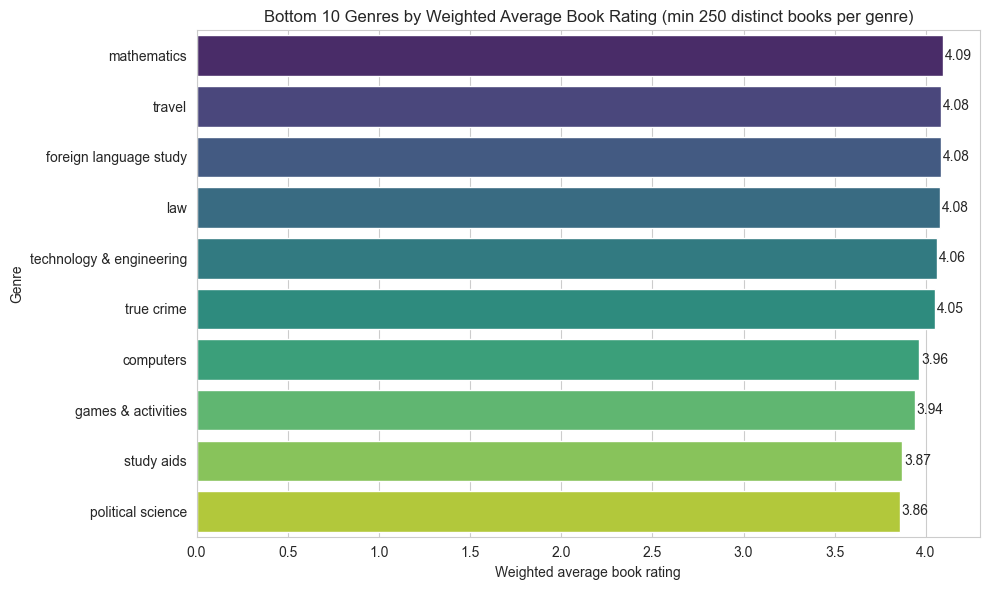

In [18]:
bot_genres = agg.tail(10).copy()
print(agg.shape)

# Plot horizontal bar chart
plt.figure(figsize=(10, max(6, len(bot_genres)*0.25)))
sns.set_style('whitegrid')
ax = sns.barplot(x='weighted_avg_rating', y=genre_col, data=bot_genres, palette='viridis')
ax.set_xlabel('Weighted average book rating')
ax.set_ylabel('Genre')
ax.set_title(f'Bottom 10 Genres by Weighted Average Book Rating (min {min_books} distinct books per genre)')

# annotate bar values
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.01, p.get_y() + p.get_height()/2, f'{width:.2f}', va='center')

plt.tight_layout()
plt.show()